# **Step 1: Domain Documents**

For the following step, data exploration needs to be done and documented for the rag-datasets/rag-mini-wikipedia

### Libraries install and import

In [28]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [5]:
dataset_text = load_dataset('rag-datasets/rag-mini-wikipedia', 'text-corpus')

dataset_qa = load_dataset('rag-datasets/rag-mini-wikipedia', 'question-answer')

data/test.parquet/part.0.parquet:   0%|          | 0.00/54.4k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/918 [00:00<?, ? examples/s]

Making Given QA corpus to Dataframe

### EDA on the QA Dataframe

#### EDA on Train Set

Checking Structure of the Dataset

In [24]:
dataset_text

DatasetDict({
    passages: Dataset({
        features: ['passage', 'id'],
        num_rows: 3200
    })
})

Printing only list of first 200 passages

In [26]:
print(dataset_text['passages']['passage'][:200])

['Uruguay (official full name in  ; pron.  , Eastern Republic of  Uruguay) is a country located in the southeastern part of South America.  It is home to 3.3 million people, of which 1.7 million live in the capital Montevideo and its metropolitan area.', 'It is bordered by Brazil to the north, by Argentina across the bank of both the Uruguay River to the west and the estuary of RÃ\xado de la Plata to the southwest, and the South Atlantic Ocean to the southeast. It is the second smallest independent country in South America, larger only than Suriname and the French overseas department of French Guiana.', 'Montevideo was founded by the Spanish in the early 18th century as a military stronghold. Uruguay won its independence in 1828 following a three-way struggle between Spain, Argentina and Brazil. It is a constitutional democracy, where the president fulfills the roles of both head of state and head of government', 'The economy is largely based in agriculture (making up 10% of the GDP an

#### EDA on Test Set

Checking Original Dataset

In [27]:
dataset_qa

DatasetDict({
    test: Dataset({
        features: ['question', 'answer', 'id'],
        num_rows: 918
    })
})

Putting Dataset in the Dataframe

In [14]:
df_qa = pd.DataFrame.from_dict(dataset_qa['test'])

Checking the Dataset

In [15]:
df_qa.head()

,question,answer,id
0,Was Abraham Lincoln the sixteenth President of...,yes,0
1,Did Lincoln sign the National Banking Act of 1...,yes,2
2,Did his mother die of pneumonia?,no,4
3,How many long was Lincoln's formal education?,18 months,6
4,When did Lincoln begin his political career?,1832,8


Checking Test Datasets Unique Variables

In [18]:
df_qa.answer.value_counts()

,count
answer,
yes,160
Yes,133
Yes.,39
no,34
No,25
...,...
"he defended William ""Duff"" Armstrong",1
(What?),1
Uruguay exports architectural services to India and Latin America,1


Simplifying Answers to have only 3 categories (Yes, No and subjective answer)

In [30]:
def simplify_answer(ans):
    ans_lower = str(ans).strip().lower()
    if ans_lower in ['yes', 'no']:
        return ans_lower
    return 'subjective answer'

df_qa['answer_3'] = df_qa['answer'].apply(simplify_answer)


Graph for the Test Dataset

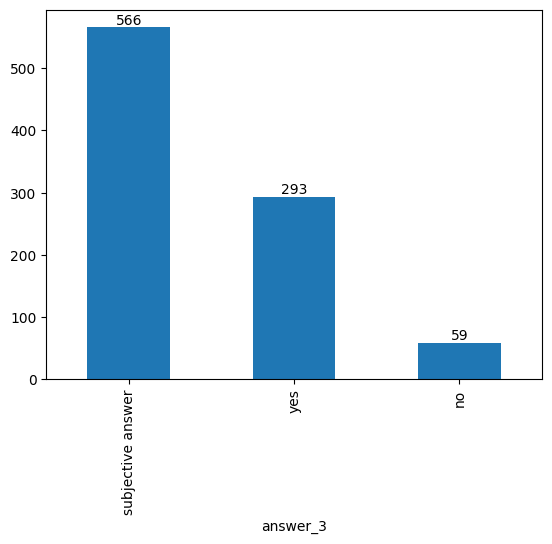

In [32]:
ax = df_qa.answer_3.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])  # Automatically annotates each bar with the count

plt.show()

## Conclusion

The dataset (test and train) is highly structured and formatted extremely appropriately to make a RAG